In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from ast import literal_eval

In [2]:
data_path = '../parsed/parsed.csv'
nrows = 10000

In [3]:
# TODO stemming lemmatization tokenization

In [4]:
df = pd.read_csv(data_path, parse_dates=['dtm'], converters={"tags": literal_eval}, nrows=nrows) 
# let's see how df looks and get some basic info
print (df)

           id  data-story-long  rating meta-rating  author_id  comments  \
0     7337284             True  7727.0    7884:157    1002684       479   
1     7337282             True    15.0       25:10    2008181         6   
2     7337254             True    28.0       39:11    2522374         2   
3     7337245             True     6.0       18:12    3073815        13   
4     7337246             True    21.0        28:7    3156206         8   
...       ...              ...     ...         ...        ...       ...   
9995  7507336             True   324.0      359:35    3200080        99   
9996  7507331             True     4.0        13:9     818151         4   
9997  5923063             True  4049.0    4168:119     704701       638   
9998  5923060             True    15.0        19:4    1872860         4   
9999  7014238             True     9.0        10:1    1872860         1   

                            dtm  views  saves       author_name  \
0     2020-04-02 15:12:18+03:00 

In [5]:
df.count()

id                 10000
data-story-long    10000
rating              9831
meta-rating        10000
author_id          10000
comments           10000
dtm                 9968
views                  0
saves              10000
author_name        10000
title              10000
tags               10000
text               10000
dtype: int64

In [6]:
# Well, there are no views in dataset, pikubu doesn't return it within html response when using search. 
# Instead it shows something like "Loading views count...", guess this loading is being made by js
# Let's drop this column
df.drop(columns=["views"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10000 non-null  int64  
 1   data-story-long  10000 non-null  bool   
 2   rating           9831 non-null   float64
 3   meta-rating      10000 non-null  object 
 4   author_id        10000 non-null  int64  
 5   comments         10000 non-null  int64  
 6   dtm              9968 non-null   object 
 7   saves            10000 non-null  int64  
 8   author_name      10000 non-null  object 
 9   title            10000 non-null  object 
 10  tags             10000 non-null  object 
 11  text             10000 non-null  object 
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 869.3+ KB


array([[<AxesSubplot:title={'center':'dtm'}>]], dtype=object)

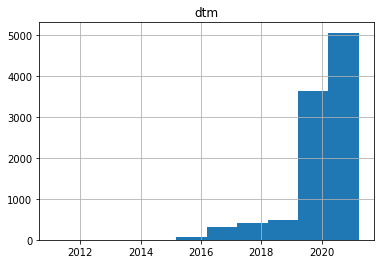

In [7]:
# let's see how posts are distributed by datetime
filtered_dtm = pd.DataFrame(df[~pd.isnull(df["dtm"])]["dtm"].apply(lambda x: x.replace(tzinfo=None)))
filtered_dtm.hist()

In [8]:
# let's delete things that we don't need anymore to save some ram
del filtered_dtm

array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

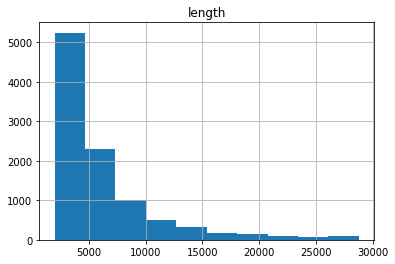

In [9]:
# and by lengths
df["length"] = np.array(df["text"].apply(len))
df.hist("length")

array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

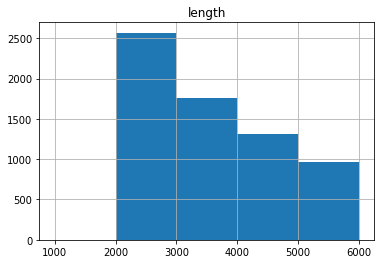

In [10]:
df.hist("length", bins=[1000, 2000, 3000, 4000, 5000, 6000])  # double check that there are no texts below 2000 characters

In [35]:
df["length"].describe()

count    10000.00000
mean      6126.71110
std       4802.39779
min       2000.00000
25%       2967.00000
50%       4478.50000
75%       7254.25000
max      28765.00000
Name: length, dtype: float64

In [11]:
# let's grab tags frequency and make hist out of them
df_tags = pd.DataFrame([tag.lower() for tag_list in df["tags"] for tag in tag_list])
tags_counts = df_tags.value_counts()

figsize = 20, 5  # declare this for further hists

len(tags_counts)  # uniue tags

11565

<AxesSubplot:xlabel='0'>

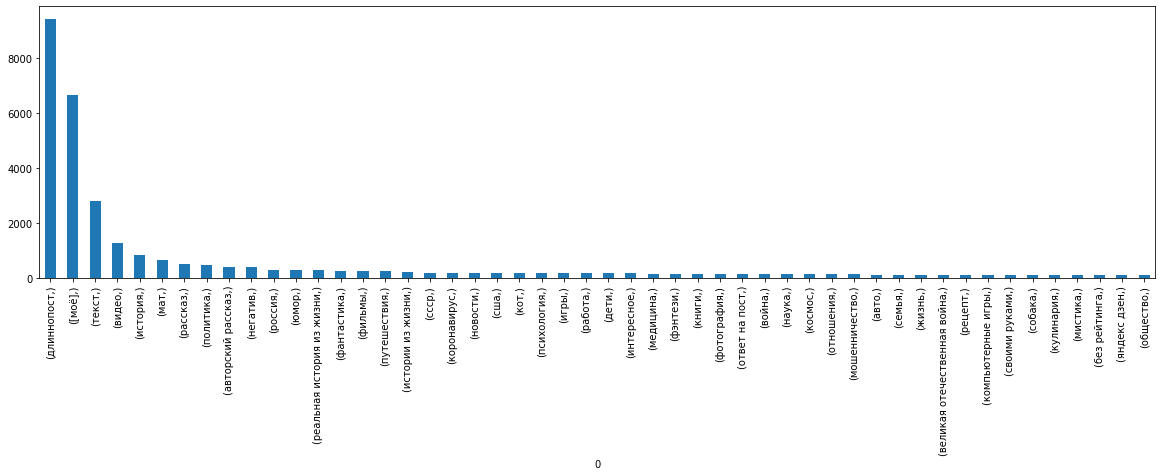

In [12]:
tags_counts[:50].plot(kind='bar', figsize=figsize)

<AxesSubplot:xlabel='0'>

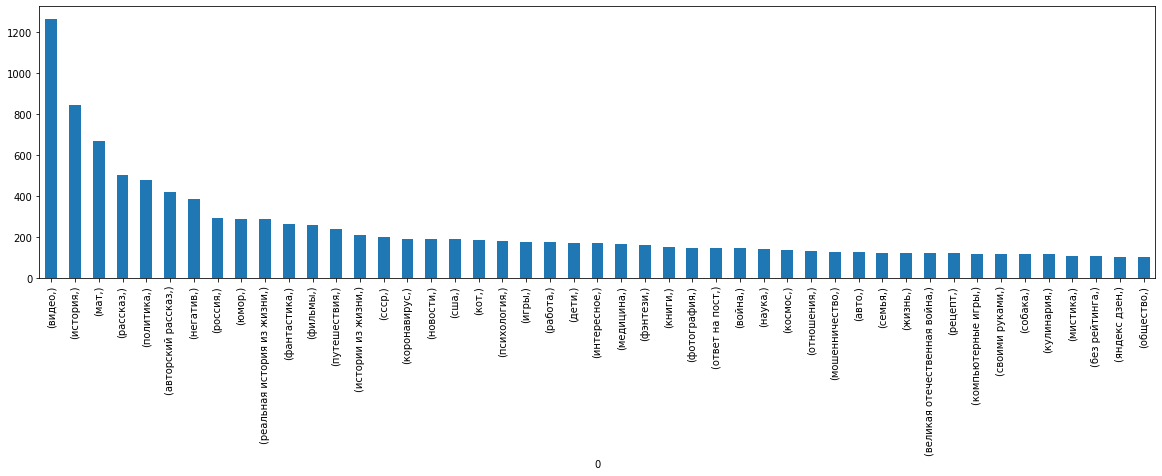

In [13]:
tags_counts[3:50].plot(kind='bar', figsize=figsize)  # now let's take a closer look at the same hist but without first 3 tags

<AxesSubplot:xlabel='0'>

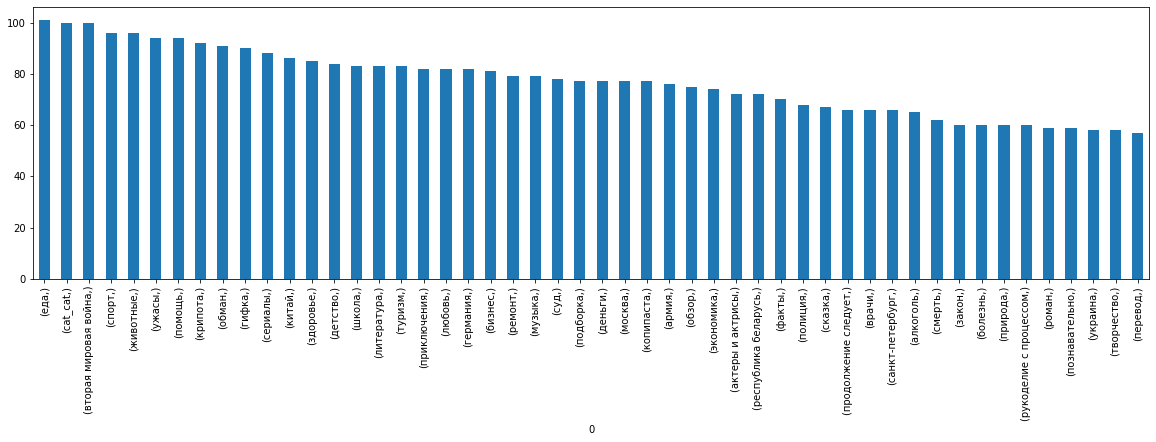

In [14]:
tags_counts[50:100].plot(kind='bar', figsize=figsize)

In [15]:
del tags_counts
del df_tags

In [16]:
# and let's make hists for words from titles and bodies too, why not
df_titles = pd.DataFrame([word.lower() for title in df["title"] for word in title.split(" ")])
titles_counts = df_titles.value_counts()
titles_counts  # very dirty

в             1827
и             1483
на            1021
как            999
часть          583
              ... 
защиты!          1
защитников       1
защитникам       1
защитника        1
№9               1
Length: 28025, dtype: int64

<AxesSubplot:xlabel='0'>

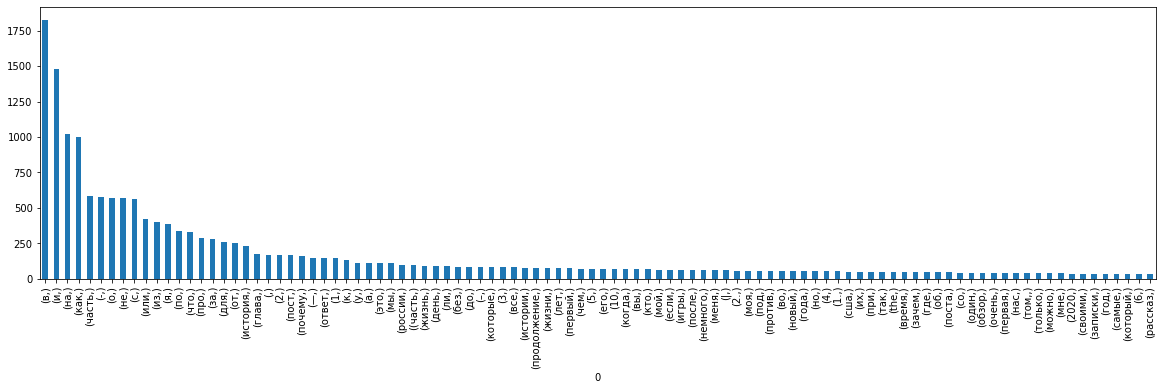

In [17]:
titles_counts[:100].plot(kind='bar', figsize=figsize)

In [18]:
del titles_counts
del df_titles

In [23]:
# for bodies
# be careful! this takes A LOT of ram. do not try on large datasets.
if nrows < 10000:
    bodies_counts = pd.Series(np.concatenate(df["text"].str.split())).value_counts()
    bodies_counts[:100].plot(kind='bar', figsize=figsize)
    del bodies_counts
else:
    print("Skipped")

Skipped


In [29]:
# now let's see how rating is distributed
df["rating"].describe()

count     9831.000000
mean       284.928085
std       1085.326831
min      -1090.000000
25%          6.000000
50%         24.000000
75%        131.000000
max      26278.000000
Name: rating, dtype: float64

<AxesSubplot:>

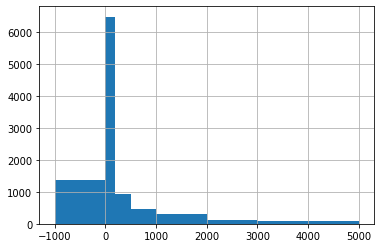

In [33]:
df["rating"].hist(bins=[-1000, 0, 200, 500, 1000, 2000, 3000, 5000])